In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Financials.csv')

In [3]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [4]:
df.tail()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014
699,Channel Partners,United States of America,VTT,High,"$1,806.00",$250.00,$12.00,"$21,672.00","$3,250.80","$18,421.20","$5,418.00","$13,003.20",01/05/2014,5,May,2014


In [10]:
# cheking the values for NULL's
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

#### There is no null values present in our dataset but we see the errors in the names of columns

In [7]:
# For making error free columns we can use strip function to remove leading whitespaces
df.columns = df.columns.str.strip()

In [11]:
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

#### Now we can see there is no leading whitespaces

In [14]:
# Now we go for data types
df.dtypes

Segment                object
Country                object
Product                object
Discount Band          object
Units Sold             object
Manufacturing Price    object
Sale Price             object
Gross Sales            object
Discounts              object
Sales                  object
COGS                   object
Profit                 object
Date                   object
Month Number            int64
Month Name             object
Year                    int64
dtype: object

#### Columns like 'Unit Sold' has a integer values but do to the dollor sign it's consider as object data types so we have to remove that sign  and convert into int data types

In [18]:
dollors = ['Units Sold','Manufacturing Price','Sale Price','Gross Sales','Discounts','Sales','COGS','Profit']
for columns in dollors:
    df[columns] = df[columns].str.replace('$','',regex = True) # regex means regular expression it find out $ sign 

In [22]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"1,618.50",3.00,20.00,"32,370.00",-,"32,370.00","16,185.00","16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"1,321.00",3.00,20.00,"26,420.00",-,"26,420.00","13,210.00","13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"2,178.00",3.00,15.00,"32,670.00",-,"32,670.00","21,780.00","10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,"13,320.00",-,"13,320.00","8,880.00","4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"2,470.00",3.00,15.00,"37,050.00",-,"37,050.00","24,700.00","12,350.00",01/06/2014,6,June,2014


In [25]:
# Now we see the '-' sign in 'Discounts' column so we need yo replace it
df['Discounts'] = df['Discounts'].str.replace('-','0',regex = True)

In [26]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"1,618.50",3.00,20.00,"32,370.00",0,"32,370.00","16,185.00","16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"1,321.00",3.00,20.00,"26,420.00",0,"26,420.00","13,210.00","13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"2,178.00",3.00,15.00,"32,670.00",0,"32,670.00","21,780.00","10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,"13,320.00",0,"13,320.00","8,880.00","4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"2,470.00",3.00,15.00,"37,050.00",0,"37,050.00","24,700.00","12,350.00",01/06/2014,6,June,2014


In [27]:
for columns in dollors:
    df[columns] = df[columns].replace(',','',regex = True)

In [28]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.50,3.00,20.00,32370.00,0,32370.00,16185.00,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.00,3.00,20.00,26420.00,0,26420.00,13210.00,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.00,3.00,15.00,32670.00,0,32670.00,21780.00,10890.00,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,13320.00,0,13320.00,8880.00,4440.00,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.00,3.00,15.00,37050.00,0,37050.00,24700.00,12350.00,01/06/2014,6,June,2014


In [39]:
# Now we changing the data types of columns
df['Units Sold'] = df['Units Sold'].astype(float)
df['Manufacturing Price'] = df['Manufacturing Price'].astype(float)
df['Sale Price'] = df['Sale Price'].astype(float)
df['Gross Sales'] = df['Gross Sales'].astype(float)
df['Sales'] = df['Sales'].astype(float)
df['COGS'] = df['COGS'].astype(float)
df['Date'] = pd.to_datetime(df['Date'])


In [75]:
# We see the some problems in 'Profit' column
df['Profit'] = df['Profit'].replace('', '0').str.replace('(', '-').str.replace(')', '').astype(float)




In [76]:
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                      object
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
Month Number                    int64
Month Name                     object
Year                            int64
dtype: object

In [77]:
# We need to drop some columns
df = df.drop(['Month Number','Month Name','Year'],axis = 1)

In [78]:
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                      object
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
dtype: object

#### We done with all cleaning methods and data is cleaned and organised in proper format . Now we go for analysis and visualization

In [80]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0,32370.0,16185.0,16185.0,2014-01-01
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0,26420.0,13210.0,13210.0,2014-01-01
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0,32670.0,21780.0,10890.0,2014-01-06
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0,13320.0,8880.0,4440.0,2014-01-06
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0,37050.0,24700.0,12350.0,2014-01-06


## Country Wise Analysis

In [86]:
group = df.groupby('Country').agg({'Units Sold':'sum','Profit':'sum','Sales':'sum','COGS':'sum'}).reset_index()

In [87]:
group.head(10)

,Country,Units Sold,Profit,Sales,COGS
0,Canada,247428.5,3529228.89,24887654.89,21358426.0
1,France,240931.0,3781020.79,24354172.29,20573151.5
2,Germany,201494.0,3680388.82,23505340.82,19824952.0
3,Mexico,203325.0,2907523.11,20949352.11,18041829.0
4,United States of America,232627.5,2995540.68,25029830.18,22034289.5


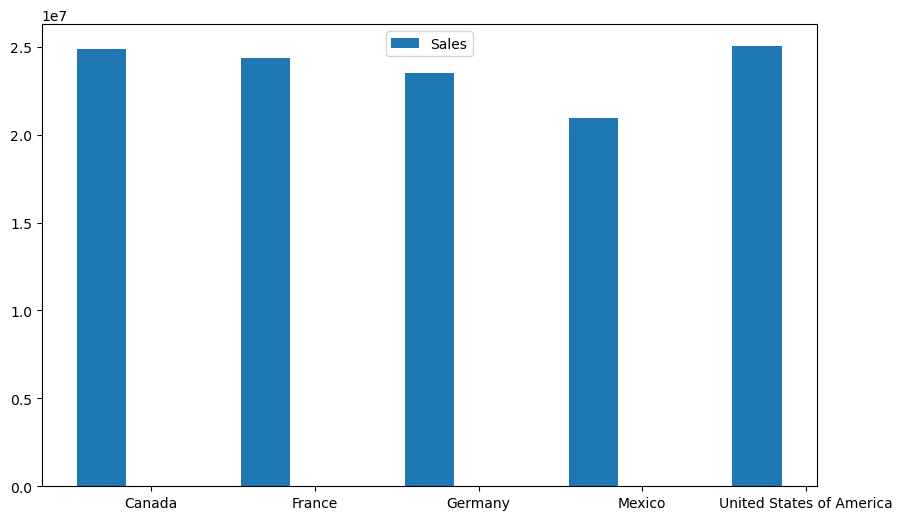

In [95]:
bar_width = 0.3
plt.figure(figsize=(10,6))
# Calculate x position for bar
x = np.arange(len(group['Country']))
plt.bar(x-bar_width,group['Sales'],bar_width,label = 'Sales')
plt.xticks(x,group['Country'])
plt.legend()
plt.show()

#### We can see that highest sales noticed in USA and Canada and lowest sales recorded in Mexico

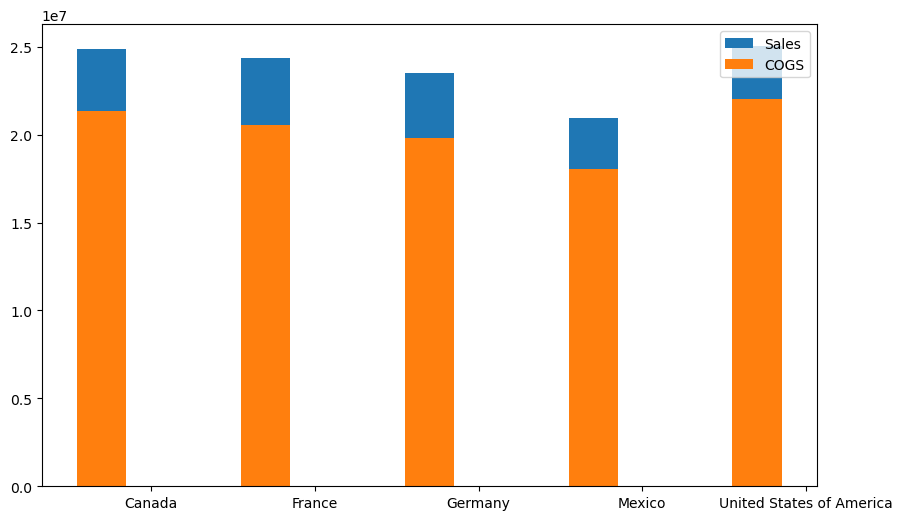

In [100]:
plt.figure(figsize=(10,6))
x = np.arange(len(group[['Country']]))
plt.bar(x-bar_width,group['Sales'],bar_width,label = 'Sales')
plt.bar(x-bar_width,group['COGS'],bar_width,label = 'COGS')
plt.xticks(x,group['Country'])
plt.legend()
plt.show()

#### We can see that Sales is more than COGS( Cost of Gross Sales).It means company was in profit

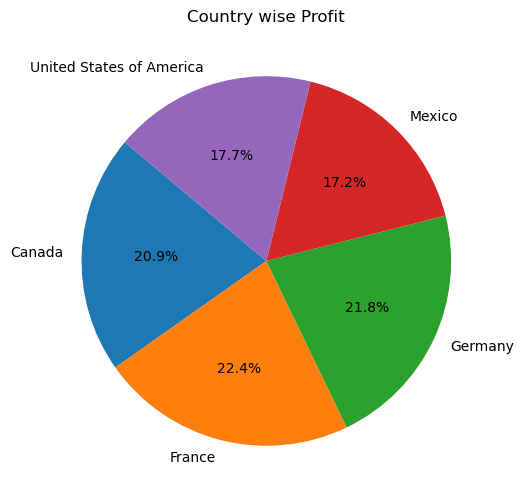

In [106]:
plt.figure(figsize=(10,6))
plt.pie(group['Profit'],labels = group['Country'],autopct = '%1.1f%%',startangle = 140)
plt.title('Country wise Profit')
#plt.legend()
plt.show()

## Product Wise Analysis

In [110]:
group_product = df.groupby('Product').agg({'Units Sold':'sum','Manufacturing Price':'mean','Sale Price':'mean','Gross Sales':'sum','Profit':'sum','COGS':'sum'}).reset_index()

In [111]:
group_product

,Product,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Profit,COGS
0,Amarilla,155315.0,260.0,128.680851,19037279.5,2814104.07,14933012.0
1,Carretera,146846.0,3.0,111.774194,14937520.5,1826804.89,11988503.0
2,Montana,154198.0,5.0,117.096774,16549834.5,2114754.88,13276047.0
3,Paseo,338239.5,10.0,108.178218,35611662.0,4797437.96,28213706.0
4,VTT,168783.0,250.0,138.587156,21968533.5,3034608.02,17477313.0
5,Velo,162424.5,120.0,115.238532,19826768.5,2305992.47,15944067.0


In [112]:
# We can create one more column which contain margin that is selling price - manufacturing price
group_product['Gross Margin'] =group_product['Sale Price'] - group_product['Manufacturing Price']

In [113]:
group_product

,Product,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Profit,COGS,Gross Margin
0,Amarilla,155315.0,260.0,128.680851,19037279.5,2814104.07,14933012.0,-131.319149
1,Carretera,146846.0,3.0,111.774194,14937520.5,1826804.89,11988503.0,108.774194
2,Montana,154198.0,5.0,117.096774,16549834.5,2114754.88,13276047.0,112.096774
3,Paseo,338239.5,10.0,108.178218,35611662.0,4797437.96,28213706.0,98.178218
4,VTT,168783.0,250.0,138.587156,21968533.5,3034608.02,17477313.0,-111.412844
5,Velo,162424.5,120.0,115.238532,19826768.5,2305992.47,15944067.0,-4.761468


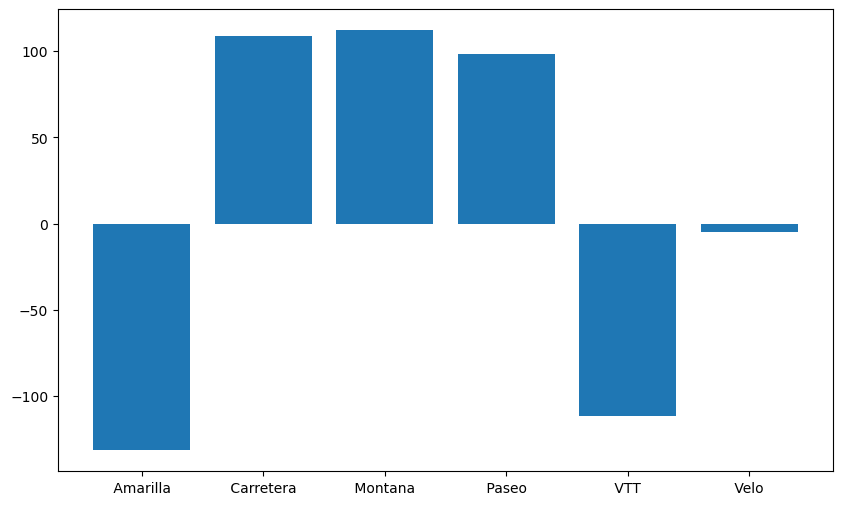

In [116]:
plt.figure(figsize=(10,6))
categories = group_product['Product']
margin_values = group_product['Gross Margin']
# create bar chart
plt.bar(categories,margin_values,label = 'Gross Margin')
plt.xticks(group_product['Product'])
plt.show()

#### From above chart we see that 'Amarilla' and ' VTT ' has negative gross margin and 'Velo' has very low margin

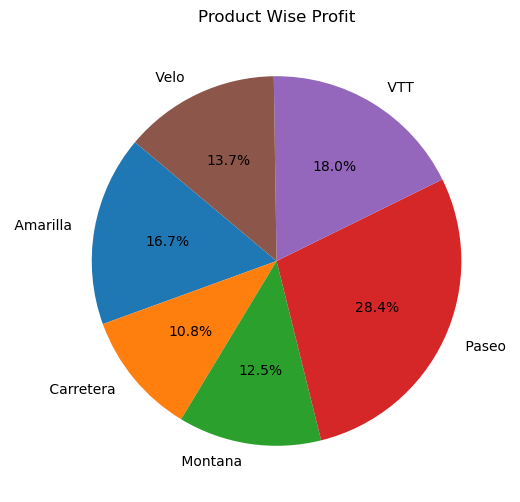

In [122]:
plt.figure(figsize=(10,6))
plt.pie(group_product['Profit'],labels = group_product['Product'],autopct = '%1.1f%%',startangle = 140)
plt.title('Product Wise Profit')
plt.show()

#### From chart we can see that 'Paseo' has highest profit and 'Montana' has lowest profit

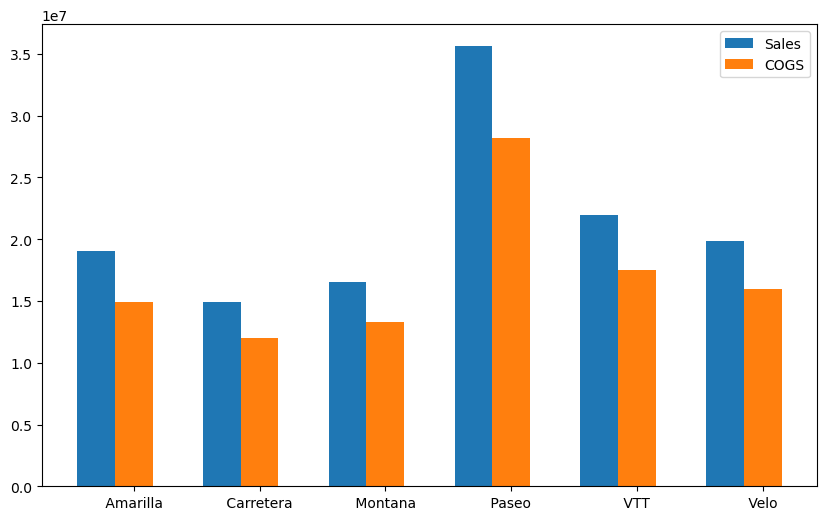

In [127]:
plt.figure(figsize=(10,6))
x = np.arange(len(group_product['Product']))
plt.bar(x-bar_width,group_product['Gross Sales'],bar_width,label = 'Sales')
plt.bar(x,group_product['COGS'],bar_width,label = 'COGS')
plt.xticks(x,group_product['Product'])
plt.legend()
plt.show()

#### Sales of 'Paseo' is much higher than others and also 'Carretera' has lowest sales

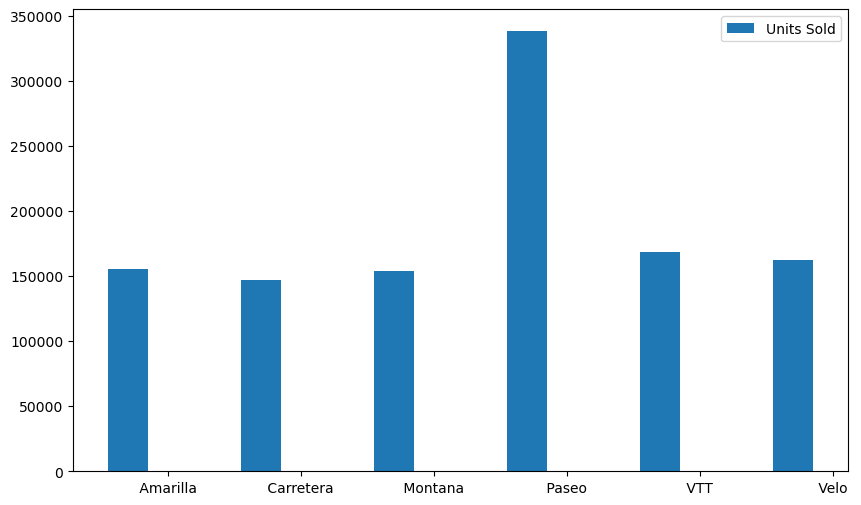

In [134]:
bar_width = 0.3
plt.figure(figsize=(10,6))
#Calculate x p[osition for bars
x = np.arange(len(group_product['Product']))
plt.bar(x-bar_width,group_product['Units Sold'],bar_width,label = 'Units Sold')
plt.xticks(x,group_product['Product'])
plt.legend()
plt.show()

#### From here we can clearly see that 'Paseo' has maximum sales

## Sector Wise Analysis

In [135]:
group_segment = df.groupby('Segment').agg({'Units Sold':'sum','Gross Sales':'sum','Profit':'sum','COGS':'sum'}).reset_index()

In [136]:
group_segment

,Segment,Units Sold,Gross Sales,Profit,COGS
0,Channel Partners,161263.5,1935162.0,1316803.14,483790.5
1,Enterprise,168552.0,21069000.0,-614545.62,20226240.0
2,Government,470673.5,56403066.5,11388173.18,41116087.5
3,Midmarket,172178.0,2582670.0,660103.09,1721780.0
4,Small Business,153139.0,45941700.0,4143168.50,38284750.0


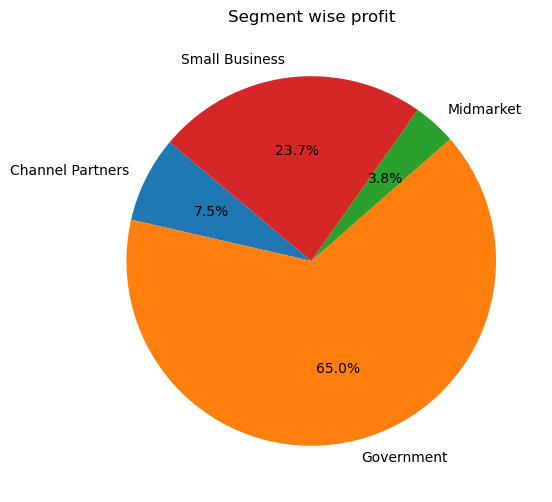

In [146]:

# Convert 'Profit' column to numeric
group_segment['Profit'] = pd.to_numeric(group_segment['Profit'], errors='coerce')  # 'coerce' handles any non-numeric values by converting them to NaN

# Drop rows with NaN values and filter out negative values
group_segment = group_segment.dropna(subset=['Profit', 'Segment'])
group_segment = group_segment[group_segment['Profit'] >= 0]

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(group_segment['Profit'], labels=group_segment['Segment'], autopct='%1.1f%%', startangle=140)
plt.title('Segment wise profit')
plt.show()


#### From above chart we clearly see the dominance of 'Government' segment

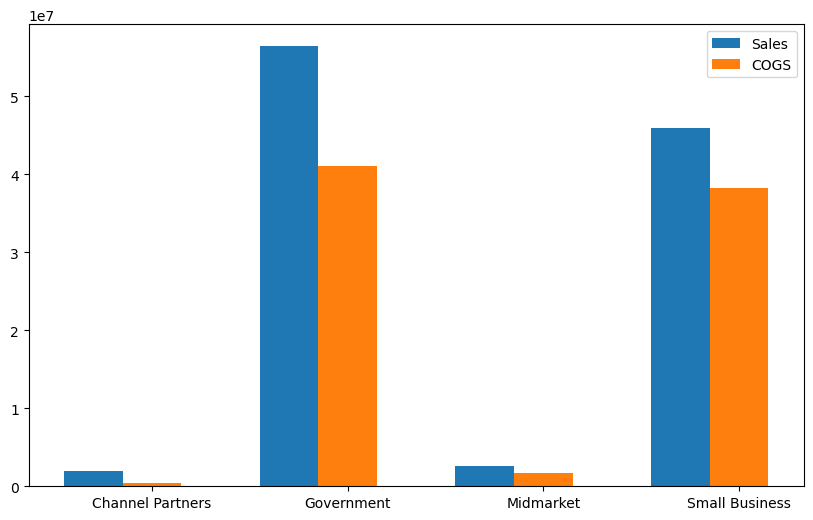

In [151]:
plt.figure(figsize=(10,6))
x = np.arange(len(group_segment['Segment']))
plt.bar(x-bar_width,group_segment['Gross Sales'],bar_width,label = 'Sales')
plt.bar(x,group_segment['COGS'],bar_width,label = 'COGS')
plt.xticks(x,group_segment['Segment'])
plt.legend()
plt.show()

#### In the Enterprise sector cost of sales and sales is almost same so we can say that margin in that sector could be low and in goverment sector difference between Sales and COGS is more means this sector has more margin

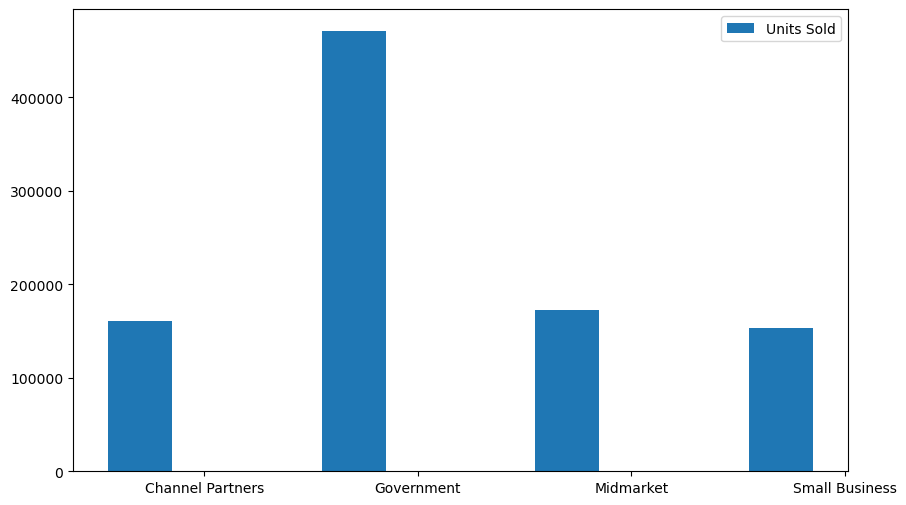

In [152]:
bar_width = 0.3
plt.figure(figsize=(10,6))
# Calculate the x positions for the bars
x = np.arange(len(group_segment['Segment']))
plt.bar(x-bar_width, group_segment['Units Sold'], bar_width, label='Units Sold')

plt.xticks(x,group_segment['Segment'])
plt.legend()
plt.show()

#### more units are sold in goverment sector then mid market and least units are sold in small business


## Analysis By Time and Date

In [153]:
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                      object
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
dtype: object

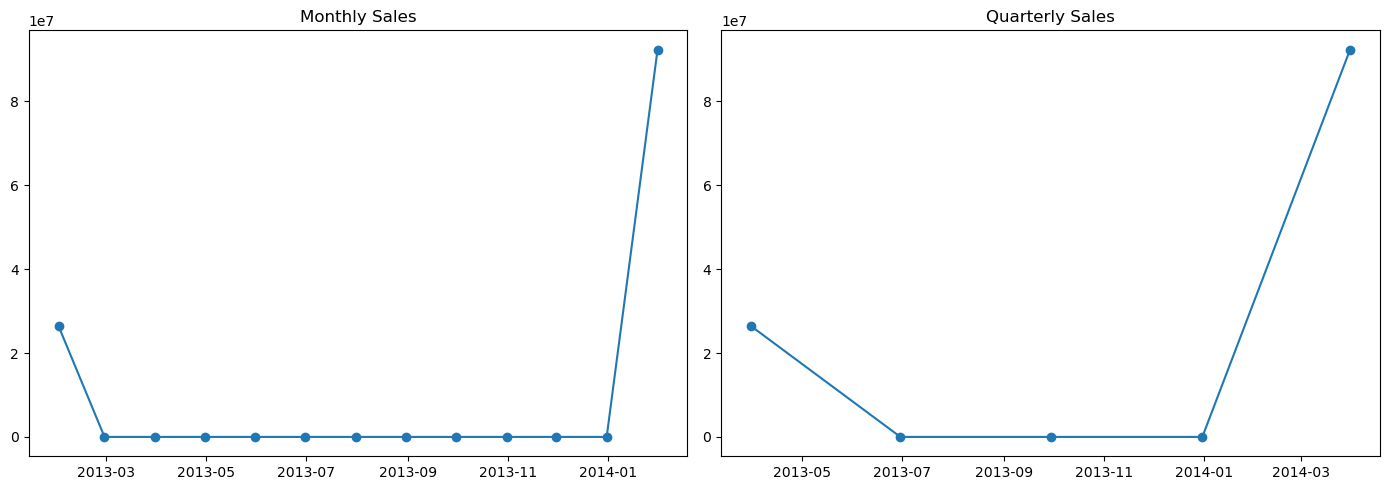

In [163]:

# Monthly and Quarterly sales
monthly_sales = df['Sales'].resample('M').sum()
quarterly_sales = df['Sales'].resample('Q').sum()

# Create line graphs for monthly and quarterly sales
plt.figure(figsize=(14, 5))

# Monthly line graph
plt.subplot(1, 2, 1)
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales')

# Quarterly line graph
plt.subplot(1, 2, 2)
plt.plot(quarterly_sales, marker='o')
plt.title('Quarterly Sales')

# Show the plots
plt.tight_layout()
plt.show()


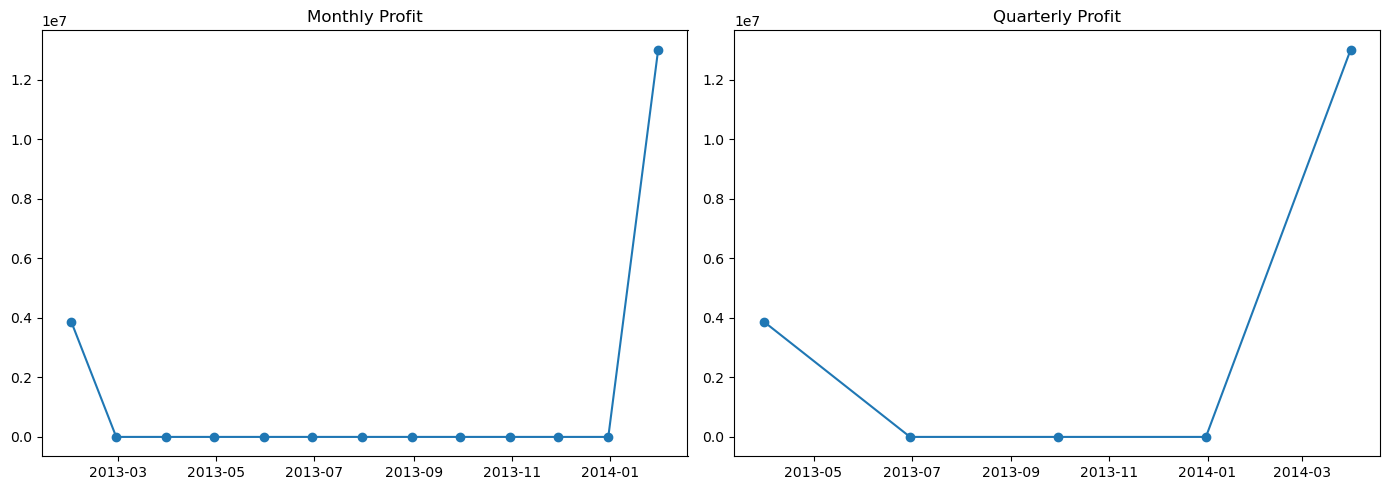

In [164]:
# df.set_index('Date', inplace=True)

monthly_profit = df['Profit'].resample('M').sum()
quarterly_profit = df['Profit'].resample('Q').sum()

# Create line graphs for monthly and quarterly sales
plt.figure(figsize=(14, 5))

# Monthly line graph
plt.subplot(1, 2, 1)
plt.plot(monthly_profit, marker='o')
plt.title('Monthly Profit')

# Quarterly line graph
plt.subplot(1, 2, 2)
plt.plot(quarterly_profit, marker='o')
plt.title('Quarterly Profit')

# Show the plots
plt.tight_layout()
plt.show()

In [165]:
Yearly_profit = df['Profit'].resample('Y').sum()

In [166]:
Yearly_profit=Yearly_profit.reset_index()
Yearly_profit

,Date,Profit
0,2013-12-31,3878464.51
1,2014-12-31,13015237.78


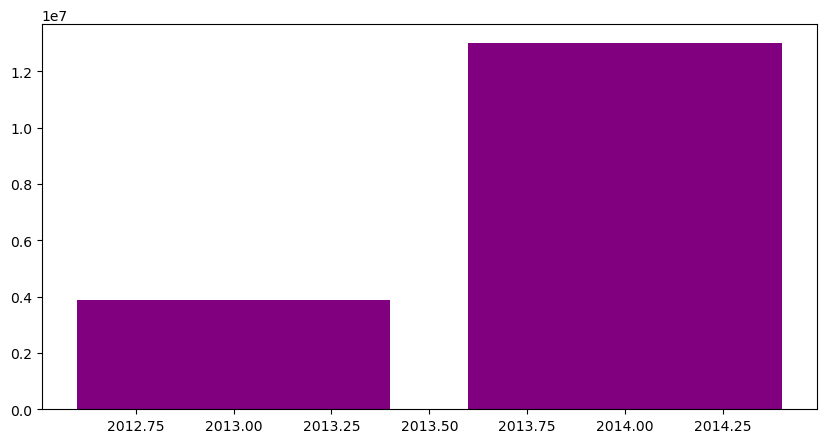

In [173]:
Yearly_profit['Date'] = pd.to_datetime(Yearly_profit['Date'])

plt.figure(figsize=(10, 5))
plt.bar(Yearly_profit['Date'].dt.year, Yearly_profit['Profit'], color='purple')
plt.show()